# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
path = r'/Users/docopeland/04 Instacart Basket Analysis'
final = pd.read_pickle(os.path.join(path,'02 Data','prepared data','final.pkl'))

# Question 1

## Busiest days of the week and hours of the day

[Text(0, 0, 'Saturday'),
 Text(1, 0, 'Sunday'),
 Text(2, 0, 'Monday'),
 Text(3, 0, 'Tuesday'),
 Text(4, 0, 'Wednesday'),
 Text(5, 0, 'Thursday'),
 Text(6, 0, 'Friday')]

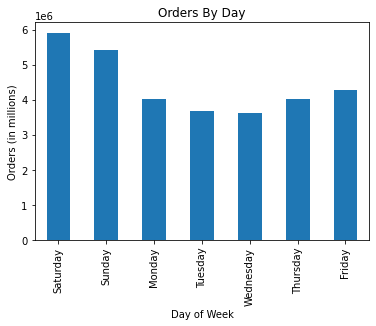

In [199]:
# create a bar chart that plots days of the week by the number of orders
q1DayBar = final['order_day_of_week'].value_counts().sort_index().plot(kind = 'bar', title = 'Orders By Day', ylabel = 'Orders (in millions)', xlabel = 'Day of Week')
q1DayBar.set_xticklabels(['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])


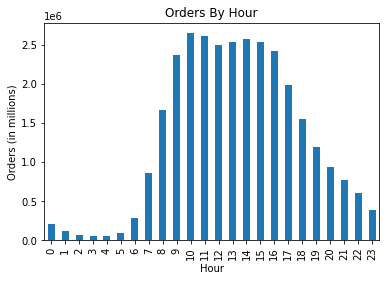

In [197]:
#bar chart that shows the hour of day and the number of orders
q1HourBar = final['order_hour_of_day'].value_counts().sort_index().plot(kind = 'bar', title = 'Orders By Hour', ylabel = 'Orders (in millions)', xlabel = 'Hour')

# Question 2

## Particular times of day when people spend the most money

In [5]:
#create a todRevenue df that groups the sum of prices by time of day and price range
todRevenue = pd.DataFrame(final.groupby(['time_of_day','price_range_loc']).agg({'prices':['sum']})).unstack()

In [6]:
#naming the columns of the todRevenue df
todRevenue.columns = ['High-range product','Low-range product','Mid-range product']

In [7]:
#sort the columns so that they go from lowest to most expensive in columns
todRevenue = todRevenue.reindex(columns = ['Low-range product','Mid-range product','High-range product'])

In [8]:
todRevenue

,Low-range product,Mid-range product,High-range product
time_of_day,,,
Afternoon,11349824.9,79342559.8,54196867.8
Morning,10443444.6,72220575.2,49514577.9
Night,7461830.6,52273229.1,32713371.7


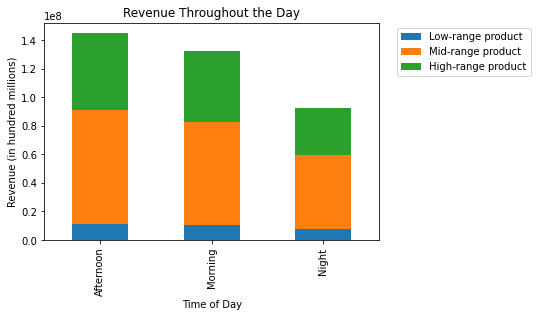

In [9]:
#creating a bar chart that shows the revenue throughout the day 
todRevenue.plot(kind = 'bar', stacked = True)
plt.title('Revenue Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Revenue (in hundred millions)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [10]:
#create a new todOrders df that groups the count of orders by time of day and price range
todOrders = pd.DataFrame(final.groupby(['time_of_day','price_range_loc']).agg({'order_id':['count']})).unstack()

In [11]:
#setting the names of the columns
todOrders.columns = ['High-range product','Low-range product','Mid-range product']

In [12]:
#sorting the columns from low to high
todOrders = todOrders.reindex(columns = ['Low-range product','Mid-range product','High-range product'])

In [13]:
todOrders

,Low-range product,Mid-range product,High-range product
time_of_day,,,
Afternoon,3749760,8131252,158159
Morning,3456354,7404869,137679
Night,2468726,5355650,102115


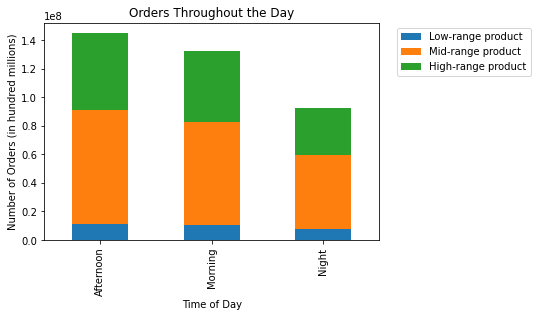

In [14]:
#creating a bar chart that shows the revenue throughout the day 
todRevenue.plot(kind = 'bar', stacked = True)
plt.title('Orders Throughout the Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Orders (in hundred millions)')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# Question 3

## Instacart has a lot of products with different price tags.

In [109]:
final['price_range_loc'].value_counts()

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

Text(0.5, 1.0, 'Number of Items by Price Range')

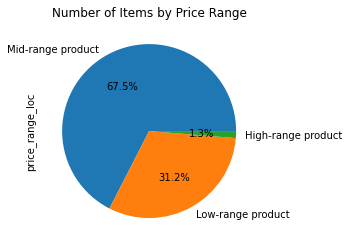

In [110]:
q3 = final['price_range_loc'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Number of Items by Price Range')

In [111]:
q3b = final.groupby(['price_range_loc']).agg({'order_id':['count']})

In [112]:
q3b.columns = ['order_count']

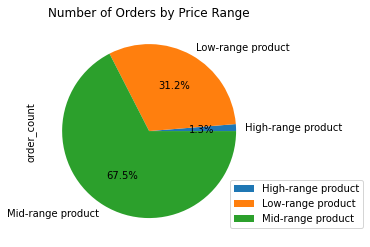

In [181]:
q3b.plot(kind = 'pie', autopct = '%1.1f%%', y = 'order_count', title = 'Number of Orders by Price Range')
plt.legend(bbox_to_anchor=(.85,.3), loc="upper left")

# Question 4

## Are there certain types of products that are more popular than others?

<AxesSubplot:title={'center':'Number of Products by Department'}, xlabel='Departments', ylabel='Orders (in millions)'>

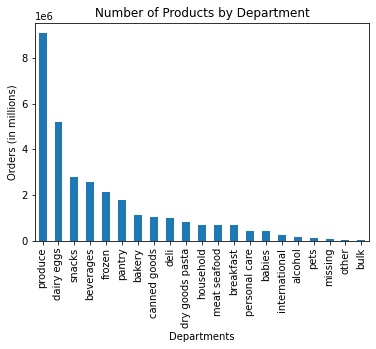

In [200]:
final['department'].value_counts().plot(kind = 'bar', title = 'Number of Products by Department', ylabel = 'Orders (in millions)', xlabel = 'Departments')

In [18]:
dept = final[final['department'] == 'produce']

In [182]:
dept['product_name'].value_counts()

Banana                                453164
Bag of Organic Bananas                366403
Organic Strawberries                  255988
Organic Baby Spinach                  231772
Organic Hass Avocado                  206799
                                       ...  
Baby Beets                                 2
Kumkuats                                   2
Organic Honey Bunch Grape Tomatoes         2
Graffiti Eggplant                          2
Red Banana                                 2
Name: product_name, Length: 1684, dtype: int64

# Question 5 Ordering Behavior

## 5a Brand Loyalty Status

<AxesSubplot:title={'center':'Customers by Brand Loyalty'}, ylabel='frequency_flag'>

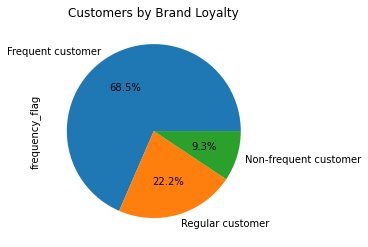

In [184]:
final['frequency_flag'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', title = 'Customers by Brand Loyalty')

In [186]:
q5a = final.groupby(['frequency_flag']).agg({'prices':['mean'],'total_customer_orders':['mean']})

In [187]:
q5a.columns = ['prices','orders']

In [188]:
q5a = q5a.sort_values('orders')

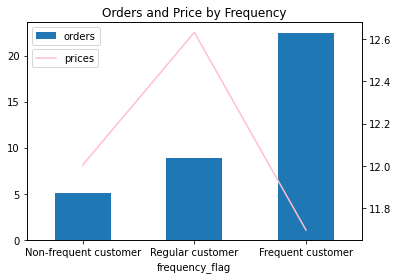

In [202]:
q5a.orders.plot(kind = 'bar', label = 'Orders', title = 'Orders and Price by Frequency', xlabel = "Frequency")
plt.ylabel = 'Number of Orders'
plt.legend(bbox_to_anchor=(1.,1), loc='upper right', labels = ['orders'])
q5a.prices.plot(kind = 'line', color = 'pink', secondary_y = True, label = 'Prices')
plt.ylabel = 'Average Price'
plt.legend(bbox_to_anchor=(0,.9), loc="upper left", labels = ['prices','orders'])

## 5b Customer Loyalty Status

In [26]:
final['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: loyalty_flag, dtype: int64

<AxesSubplot:title={'center':'Customers by Loyalty Status'}, ylabel='loyalty_flag'>

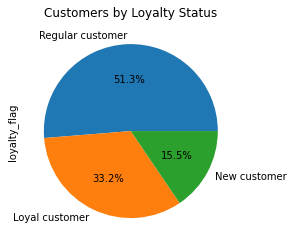

In [183]:
final['loyalty_flag'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', title = 'Customers by Loyalty Status')

In [137]:
q5b = final.groupby(['loyalty_flag']).agg({'prices':['mean'],'user_id':['count']})

In [138]:
q5b.columns = ['prices','orders']

In [141]:
q5b = q5b.sort_values('prices')

TypeError: 'str' object is not callable

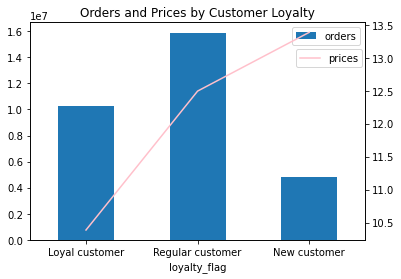

In [203]:
q5b.orders.plot(kind = 'bar', label = 'Orders', title = 'Orders and Prices by Customer Loyalty')
plt.ylabel = 'Number of Orders'
plt.legend(bbox_to_anchor=(1,1), loc='upper left', labels = ['orders'])
q5b.prices.plot(kind = 'line', color = 'pink', secondary_y = True, label = 'Prices')
plt.ylabel = 'Average Price'
plt.legend(bbox_to_anchor=(.78,.9), loc="upper left", labels = ['prices','orders'])
plt.title('Orders and Price')

## 5c Region

In [52]:
final['region'].value_counts()

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

<AxesSubplot:title={'center':'Orders by Region'}, ylabel='region'>

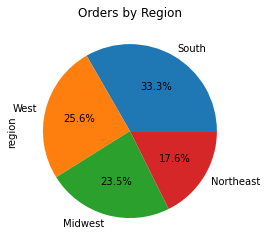

In [211]:
final['region'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', title = 'Orders by Region')

In [85]:
q5region = final.groupby(['region']).agg({'department':['count']})

In [212]:
q5region

,user_id
,count
region,
Midwest,7261513
Northeast,5464685
South,10311139
West,7927227


In [129]:
q5c = final.groupby(['region']).agg({'prices':['mean'],'order_id':['count']})

In [130]:
q5c.columns = ['prices','orders']

In [131]:
q5c = q5c.sort_values('prices')

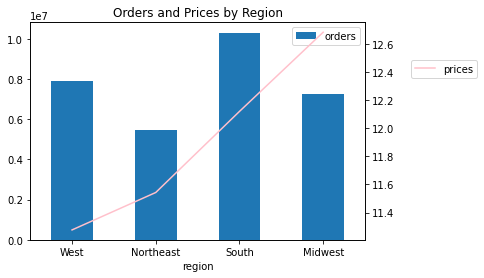

In [204]:
q5c.orders.plot(kind = 'bar', label = 'Orders', title = 'Orders and Prices by Region')
plt.ylabel = 'Number of Orders'
plt.legend(bbox_to_anchor=(1.35,1), loc='upper right', labels = ['orders'])
q5c.prices.plot(kind = 'line', color = 'pink', secondary_y = True, label = 'Prices')
plt.ylabel = 'Average Price'
plt.legend(bbox_to_anchor=(1.35,.85), loc="upper right", labels = ['prices','orders'])
plt.title = ''

## 5d Age & Family Status

In [90]:
#creating a sample with a seed of 4 with 70/30
np.random.seed(4)
dev = np.random.rand(len(final)) <= 0.7
small = final[~dev]

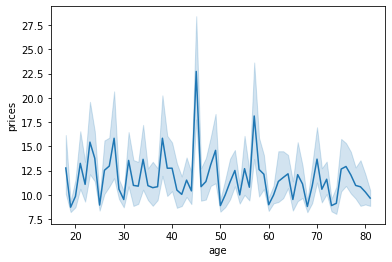

In [207]:
q5d = sns.lineplot(data = small[['age','prices']], x = 'age',y = 'prices')

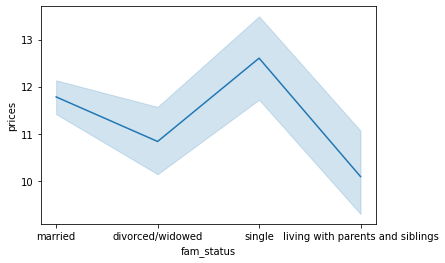

In [93]:
q5dFam = sns.lineplot(data = small[['fam_status','prices']], x = 'fam_status', y = 'prices')

## 5e Income

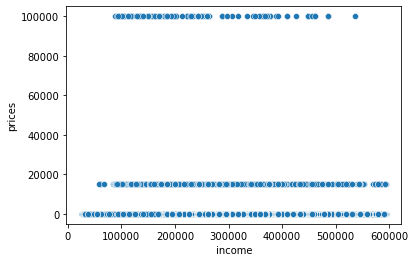

In [94]:
q5e = sns.scatterplot(x = 'income', y = 'total_customer_orders', data = small)

## 5f Customer Profiles

<AxesSubplot:title={'center':'Profile Count'}, ylabel='profile'>

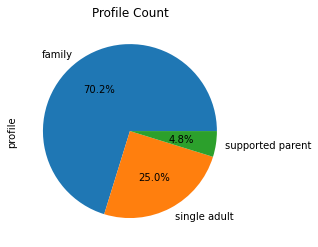

In [209]:
final['profile'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', title = "Profile Count")

In [160]:
q5f = final.groupby(['profile']).agg({'prices':['mean'], 'total_customer_orders':['mean']})

In [161]:
q5f.columns = ['prices','orders']

TypeError: 'bool' object is not iterable

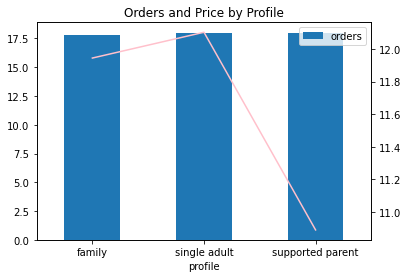

In [210]:
q5f.orders.plot(kind = 'bar', label = 'Orders', title = 'Orders and Price by Profile')
plt.ylabel = 'Number of Orders'
plt.legend(bbox_to_anchor=(1.5,1), loc='upper right', labels = ['orders'])
q5f.prices.plot(kind = 'line', color = 'pink', secondary_y = True, label = 'Prices')
plt.ylabel = 'Average Price'
plt.legend(bbox_to_anchor=(1.35,.85), loc="upper right", labels = False)
plt.title = 'Prices and Orders by Customer Profile'